In [3]:
import datetime
import string
import random

import pandas as pd
import sqlite3

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [17]:
def load_dataframe():
    con = sqlite3.connect("../data/global_urban_building_completeness.gpkg")
    query = f"""
        select
            a.urban_center_id 
            --,b.gini 
            --,b.moran 
            --,b.spatial_proximity
            ,b."cluster" as cluster_label
            ,100*a.prediction_osm_completeness_2023 as "2023"
            ,100*a.prediction_osm_completeness_2022 as "2022"
            ,100*a.prediction_osm_completeness_2021 as "2021"
            ,100*a.prediction_osm_completeness_2020 as "2020"
            ,100*a.prediction_osm_completeness_2019 as "2019"
            ,100*a.prediction_osm_completeness_2018 as "2018"             
            ,100*a.prediction_osm_completeness_2017 as "2017"
            ,100*a.prediction_osm_completeness_2016 as "2016"
            ,100*a.prediction_osm_completeness_2015 as "2015"
            ,100*a.prediction_osm_completeness_2014 as "2014"
            ,100*a.prediction_osm_completeness_2013 as "2013"
            ,100*a.prediction_osm_completeness_2012 as "2012"
            ,100*a.prediction_osm_completeness_2011 as "2011"
            ,100*a.prediction_osm_completeness_2010 as "2010"
            ,100*a.prediction_osm_completeness_2009 as "2009"
            ,100*a.prediction_osm_completeness_2008 as "2008"
        from rf_adjusted_prediction_reference_and_osm_urban_centers a
        left join inequality_measures_urban_centers b on
            a.urban_center_id = b.urban_center_id 
        order by a.urban_center_id
    """
    df = pd.read_sql_query(query, con=con)
    return df

In [18]:
df = load_dataframe()

In [19]:
display(df)

,urban_center_id,cluster_label,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
0,1,d,62.492573,61.896929,56.076992,49.712033,48.623992,46.283597,35.889338,30.584107,28.374548,20.282650,20.595986,14.712971,4.669625,0.212321,0.00000,0.0
1,2,e,103.019222,102.944643,102.920024,102.821676,24.859420,23.245094,18.184828,17.193933,11.996557,8.439110,2.262461,1.638814,0.075230,0.075230,0.00000,0.0
2,3,c,36.903378,34.160020,33.420651,32.774807,30.809277,30.683010,30.691725,28.311957,28.344755,24.567627,10.107842,0.348608,0.002912,0.000000,0.00000,0.0
3,4,e,94.160610,94.159146,94.131345,93.182551,92.002216,20.765213,16.533691,16.011996,15.211375,14.450997,10.814861,2.962219,2.542502,2.046963,0.50164,0.0
4,5,e,101.406126,104.542640,104.638199,104.055550,104.605244,19.362800,15.304624,13.058216,12.599425,12.025109,4.153336,3.905405,0.556912,0.039698,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13184,13185,d,50.705090,43.193137,37.767234,33.561569,29.784104,26.953583,26.560709,26.779405,4.996703,4.695810,1.253253,1.233718,0.000000,0.000000,0.00000,0.0
13185,13186,None,39.423955,38.655430,38.138533,38.138533,26.019724,26.019724,26.019724,26.019724,26.019724,26.019724,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
13186,13187,None,94.469737,94.010050,90.612868,89.709043,50.044228,46.169905,44.360242,39.723659,36.839580,0.221907,0.221907,0.221907,0.221907,0.000000,0.00000,0.0
13187,13188,e,83.578740,83.560045,83.323059,83.336218,80.889778,64.484346,58.415550,51.997900,51.254541,49.912698,32.164269,11.734909,3.604879,1.644023,0.00000,0.0


In [20]:
df = df.melt(
    id_vars=["cluster_label", "urban_center_id"], 
    var_name="year", 
    value_name="prediction_osm_completeness"
)

df["year"] = df["year"].apply(pd.to_datetime)
display(df)

,cluster_label,urban_center_id,year,prediction_osm_completeness
0,d,1,2023-01-01,62.492573
1,e,2,2023-01-01,103.019222
2,c,3,2023-01-01,36.903378
3,e,4,2023-01-01,94.160610
4,e,5,2023-01-01,101.406126
...,...,...,...,...
211019,d,13185,2008-01-01,0.000000
211020,None,13186,2008-01-01,0.000000
211021,None,13187,2008-01-01,0.000000
211022,e,13188,2008-01-01,0.000000


/tmp/ipykernel_198854/1279786373.py:52: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(gs1[i])


a
b
c
d
e


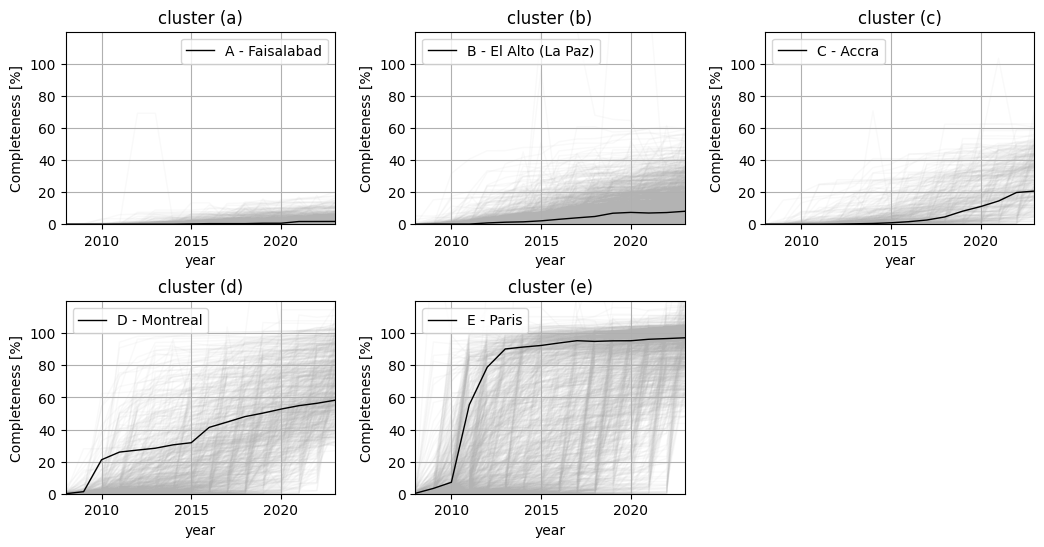

In [21]:
fig, axs = plt.subplots(1, 1, figsize=(12.5, 6))
gs1 = gridspec.GridSpec(2, 3)
gs1.update(wspace=0.3, hspace=0.4) # set the spacing between axes.

all_months = [
    datetime.date(2008, 1, 1),
    datetime.date(2009, 1, 1),
    datetime.date(2010, 1, 1),
    datetime.date(2011, 1, 1),
    datetime.date(2012, 1, 1),
    datetime.date(2013, 1, 1),
    datetime.date(2014, 1, 1),
    datetime.date(2015, 1, 1),
    datetime.date(2016, 1, 1),
    datetime.date(2017, 1, 1),
    datetime.date(2018, 1, 1),
    datetime.date(2019, 1, 1),
    datetime.date(2020, 1, 1),
    datetime.date(2021, 1, 1),
    datetime.date(2022, 1, 1),
    datetime.date(2023, 1, 1),
]

urban_center_ids_selection = [
    6445,  # Faisalabad
    854, # El Alto (La Paz)
    1912,  # Accra
    1022,  # Montreal
    2054  # Paris
]  

df.dropna(inplace=True)

cluster_labels = [
    "a", "b", "c", "d", "e"
]

title_labels = [
    "cluster (a)", "cluster (b)", "cluster (c)", "cluster (d)", "cluster (e)"
]

point_labels_names = [
    "A - Faisalabad",
    "B - El Alto (La Paz)",
    "C - Accra",
    "D - Montreal",
    "E - Paris",
]

for i, cluster_label in enumerate(cluster_labels):
    
    ax = plt.subplot(gs1[i])
    print(cluster_label)
    
    region_df = df.loc[df["cluster_label"] == str(cluster_label)]
    region_df.reset_index(inplace=True)
    
    urban_center_ids = region_df["urban_center_id"].to_list()
            
    sns.lineplot(
        data=region_df,
        x="year",
        y="prediction_osm_completeness",
        units="urban_center_id",
        alpha=0.075,
        estimator=None,
        color=".7",
        linewidth=1,
        ax=ax,
        legend=False,
    )
    
    sample_urban_centers = random.sample(urban_center_ids, 10)
        
    example_df = region_df.loc[region_df["urban_center_id"].isin(urban_center_ids_selection)]
    example_df.reset_index(inplace=True)
    
    sns.lineplot(
        data=example_df,
        x="year",
        y="prediction_osm_completeness",
        legend=True,
        label=point_labels_names[i],
        linewidth=1.0,
        color="black"
    )
    
    ax.set_ylim([0, 120])
    ax.set_xlim([datetime.date(2008, 1, 1), datetime.date(2023, 1, 1)])
    ax.set_xticks([
        datetime.date(2010, 1, 1),
        datetime.date(2015, 1, 1),
        datetime.date(2020, 1, 1),
    ])
    ax.set_xticklabels(["2010", "2015", "2020"])
    ax.set_yticks([
        0, 20, 40, 60, 80, 100
    ])
    ax.set_ylabel("Completeness [%]")
    ax.set_title(title_labels[i])
    ax.grid()

plt.savefig(
    "../figures/temporal_evolution_urban_completeness_clustering_plot.png",
    dpi=300,
    bbox_inches = 'tight',
    pad_inches = 0.75
)
plt.show()